# Introduction

*Project* ini membahas tentang penerapan *Supervised Machine Learning*, yaitu metode *Classification*. Algoritma model klasifikasi yang digunakan adalah Logistic Regression, Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbor, Random Forest, dan Naive Bayes. Tujuan dari *project* ini adalah mengevaluasi dan menerapkan metode klasifikasi pada *Machine Learning*. Data yang digunakan dalam *project* ini adalah dataset yang berisi kampanye pemasaran suatu institusi bank. Dataset ini terbagi menjadi empat. Berikut penjelasannya:

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014].
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

Dalam *project* ini, dataset yang digunakan adalah dataset bank-additional-full.csv, kecuali pada algoritma SVM, karena pada algoritma SVM akan menggunakan dataset bank-additional.csv dengan jumlah observasi yang lebih kecil. Objektif dari klasifikasi menggunakan data ini adalah memprediksi apakah suatu klien bank akan berlangganan deposito berjangka (variabel y) berdasarkan atribut-atribut kampanye pemasaran yang dilakukan oleh suatu institusi bank.

**Sumber**: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Import pustaka yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/drive/MyDrive/AI_UAS/bankresampling.csv'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data loading

In [ ]:
df_bank_full = pd.read_csv('bankresampling.csv', sep=';')
# df_bank = pd.read_csv('/content/bank.csv', sep=';')

In [ ]:
# Menyalin data
df = df_bank_full.copy()
# df = df_bank.copy()

In [ ]:
# 5 data pertama
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# 5 data terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10584,59,retired,divorced,secondary,no,208,no,yes,cellular,28,jan,503,2,-1,0,unknown,no
10585,42,unemployed,married,secondary,no,1990,yes,yes,unknown,19,may,13,1,-1,0,unknown,no
10586,38,self-employed,married,secondary,no,279,yes,no,unknown,28,may,110,5,-1,0,unknown,no
10587,51,management,married,tertiary,no,2704,yes,no,telephone,21,jul,443,1,-1,0,unknown,no
10588,33,technician,married,secondary,no,6699,no,no,cellular,9,nov,425,1,462,1,failure,no


In [ ]:
# Memeriksa dimensi dari dataset (jumlah baris, jumlah kolom)
df.shape

(10589, 17)

In [ ]:
# Ringkasan dataset (tipe masing-masing kolom pada data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10589 entries, 0 to 10588
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10589 non-null  int64 
 1   job        10589 non-null  object
 2   marital    10589 non-null  object
 3   education  10589 non-null  object
 4   default    10589 non-null  object
 5   balance    10589 non-null  int64 
 6   housing    10589 non-null  object
 7   loan       10589 non-null  object
 8   contact    10589 non-null  object
 9   day        10589 non-null  int64 
 10  month      10589 non-null  object
 11  duration   10589 non-null  int64 
 12  campaign   10589 non-null  int64 
 13  pdays      10589 non-null  int64 
 14  previous   10589 non-null  int64 
 15  poutcome   10589 non-null  object
 16  y          10589 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Berdasarkan yang sudah diketahui sebelumnya bahwa terdapat 41188 baris/observasi dan terdapat 21 kolom/atribut, di mana terdapat 10 kolom dengan tipe numerik dan 11 kolom dengan tipe kategorik.

# Data cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [ ]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

348

In [ ]:
# Memeriksa apakah terdapat missing values dalam data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Berdasarkan *output* di atas, diketahui bahwa terdapat 12 duplikasi dan tidak terdapat *missing values*, sehingga duplikasi dalam data akan dihapus.

In [ ]:
# Menghapus duplikasi dalam data
df.drop_duplicates(keep='last', inplace=True)

In [ ]:
# Memeriksa kembali apakah masih terdapat duplikasi
df.duplicated().sum()

0

In [ ]:
# Mengembalikan nomor indeks pada data
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

# Eksplorasi data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

## Frekuensi nilai pada variabel `y`

In [ ]:
df['y'].value_counts()

yes    5289
no     4952
Name: y, dtype: int64

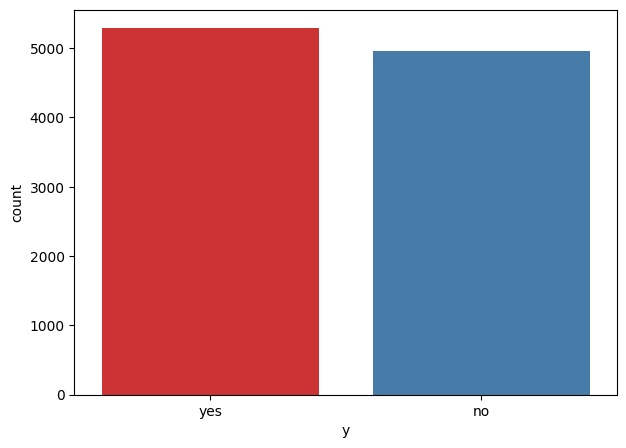

In [ ]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="y", data=df, palette="Set1")
plt.show()

Berdasarkan *output* di atas, diketahui bahwa terdapat 36537 "no" dan terdapat 4639 "yes". Hal ini dapat diartikan bahwa, sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.

## Nilai dan distribusi statistik masing-masing kolom numerik

In [ ]:
# Nilai statistik kolom numerik
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,41.191290,1530.428571,15.467923,383.897959,2.486476,53.506591,0.839469
std,11.995931,3253.953472,8.449943,354.273987,2.677860,111.009687,2.182586
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,146.000000,1.000000,-1.000000,0.000000
50%,39.000000,548.000000,15.000000,263.000000,2.000000,-1.000000,0.000000
75%,49.000000,1775.000000,21.000000,513.000000,3.000000,78.000000,1.000000
max,95.000000,102127.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


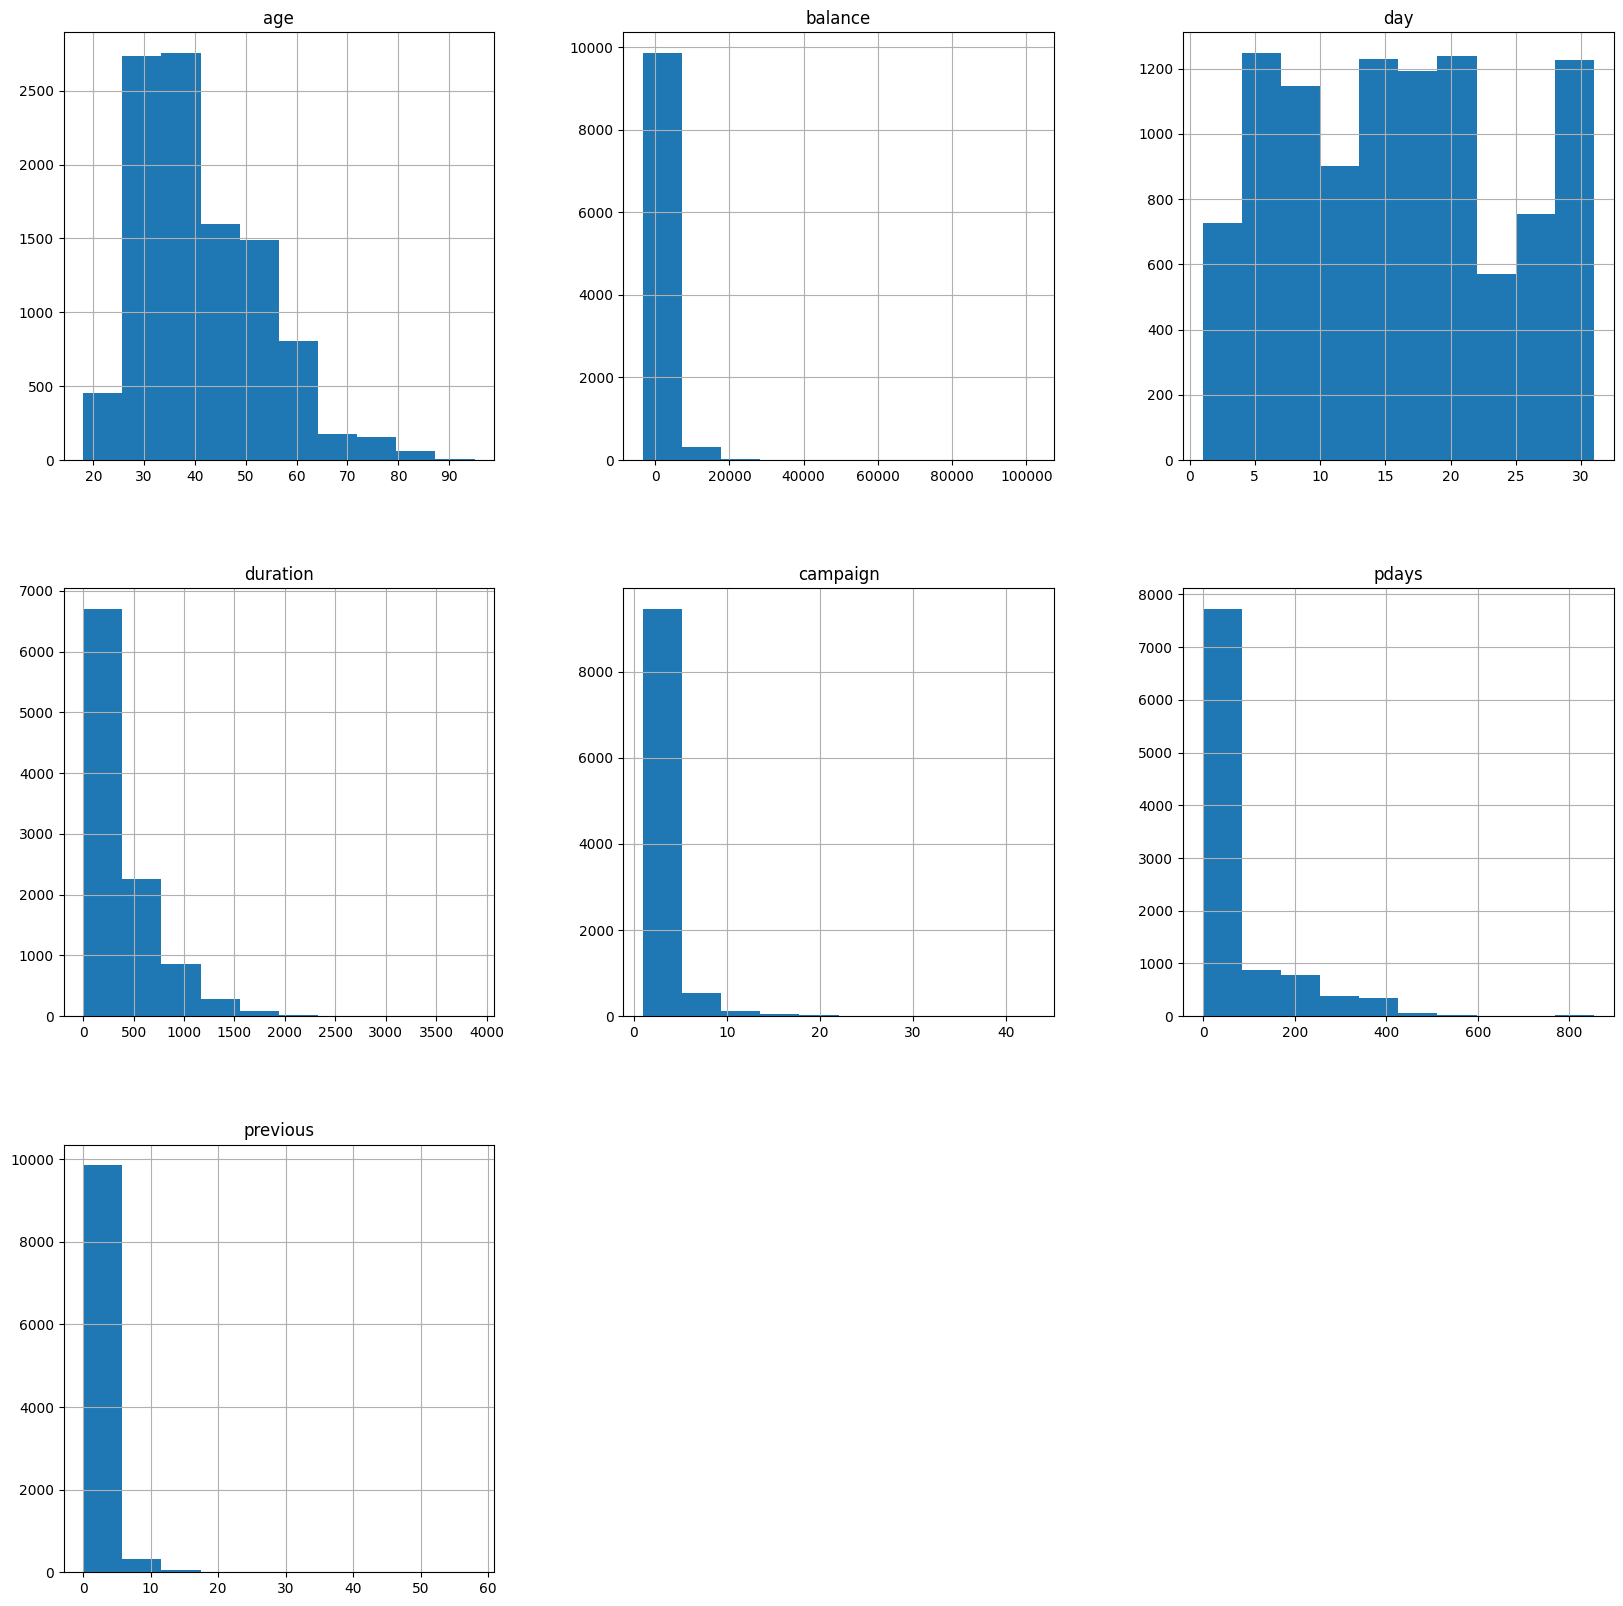

In [ ]:
# Visualisasi menggunakan histogram
df.hist(figsize=(20, 20))
plt.show()

In [ ]:
# Ubah daftar cols untuk hanya mencakup kolom yang ada dalam DataFrame
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'balance', 'day']

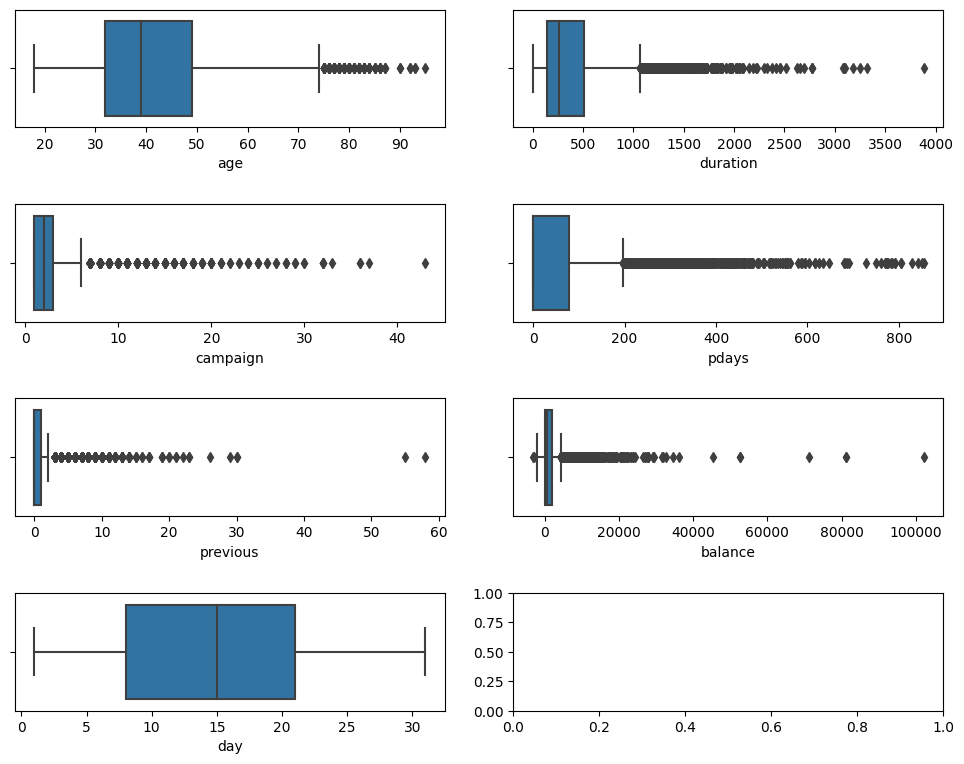

In [ ]:
# Visualisasi dengan box plot
fig, ax = plt.subplots(4, 2, figsize=(10, 8))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=ax[i])

fig.tight_layout(pad=2.0)
plt.show()

# 'cons.price.idx'
#  'cons.conf.idx'
# 'euribor3m'
# 'nr.employed'

Berdasarkan *output* plot nilai dan distribusi statistik masing-masing kolom numerik di atas, diketahui bahwa:
1. Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
2. Rata-rata durasi telepon terakhir bersama klien adalah sekitar 250 detik.
3. Kontak klien yang dihubungi dalam pelaksanaan kampanye ini adalah 2-3 kontak.
4. Kebanyakan klien tidak dihubungi atau tidak melakukan kontak pada saat kampanye sebelumnya. Hal ini ditandai dengan nilai 999 pada kolom `campaign` dan juga nilai 0 pada kolom `previous` yang mempunyai frekuensi tinggi.
5. Karakteristik sosial dan ekonomi pada saat kampanye juga disertakan dalam analisis untuk dilihat pengaruhnya pada keputusan klien dalam mengambil keputusan untuk berlangganan deposito berjangka, di mana jika dilihat dari distribusi frekuensi nilai karakteristik sosial dan ekonomi pada saat itu cukup bervariasi.

## Distribusi statistik masing-masing kolom numerik berdasarkan variabel `y`

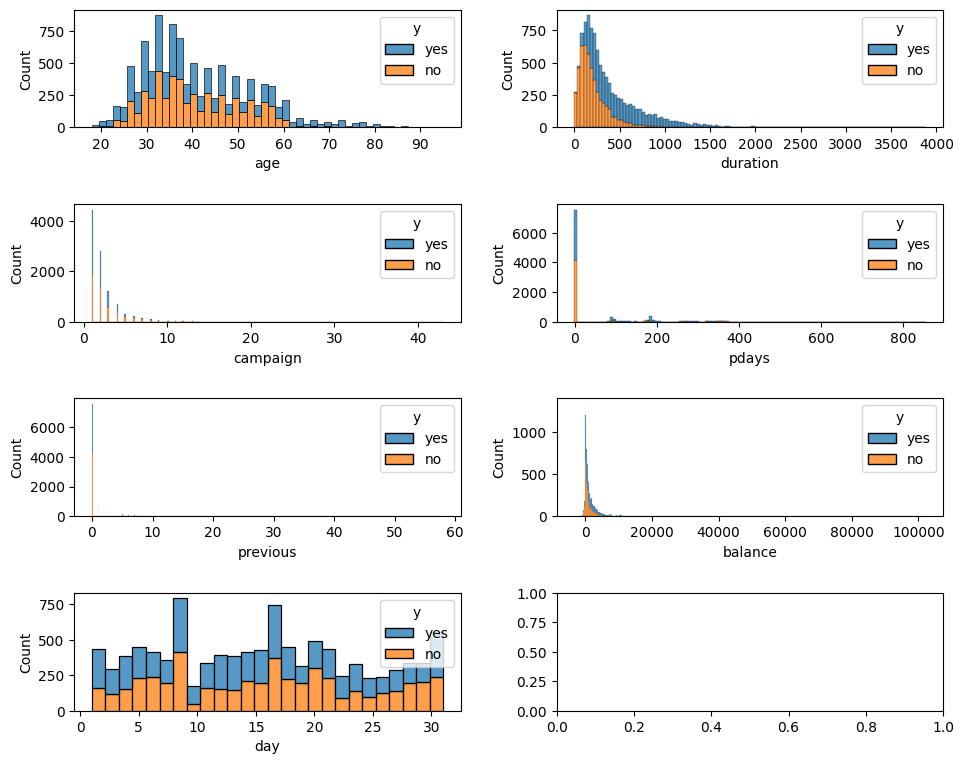

In [ ]:
# Visualisasi menggunakan histogra
cols = ['age','duration','campaign','pdays','previous','balance','day']

fig, ax = plt.subplots(4, 2, figsize=(10,8))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='y', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)

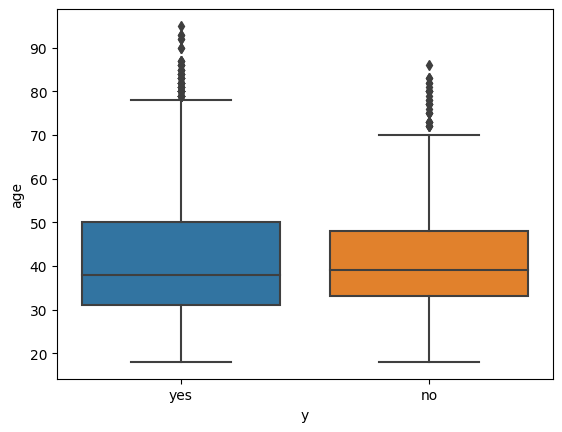

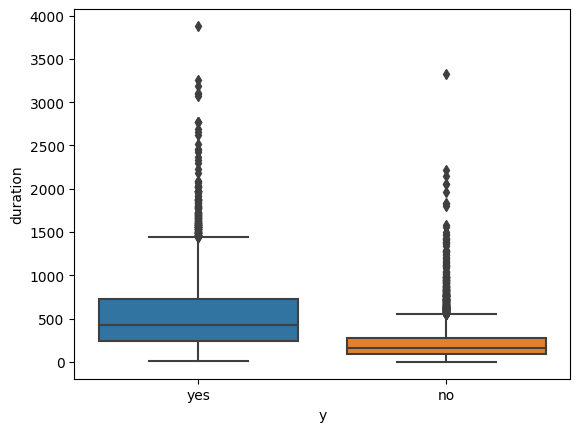

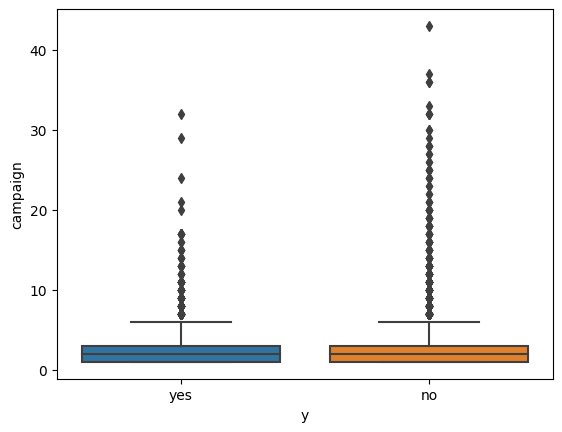

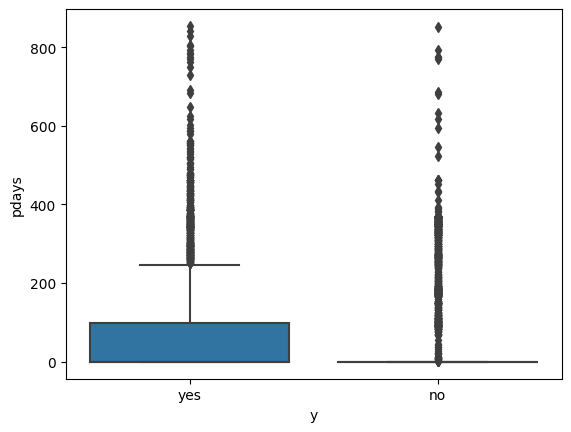

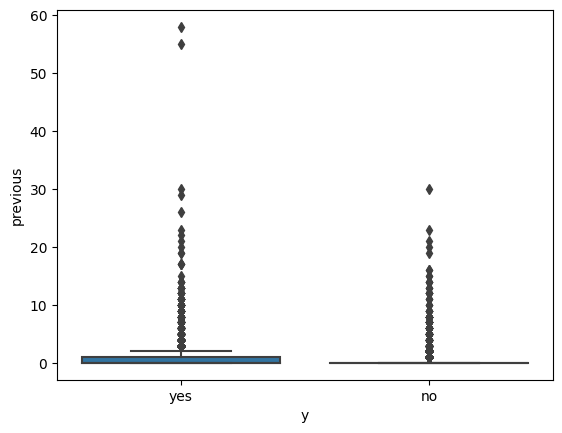

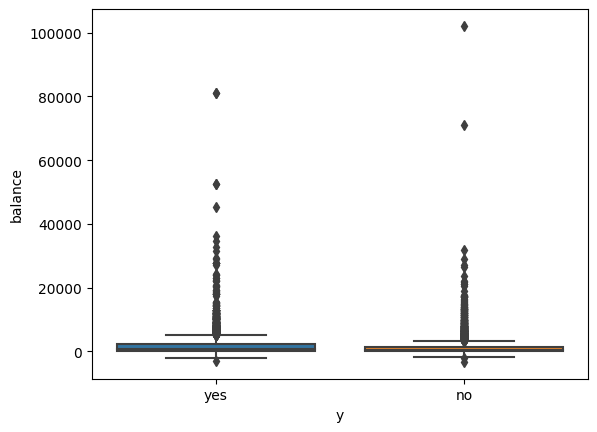

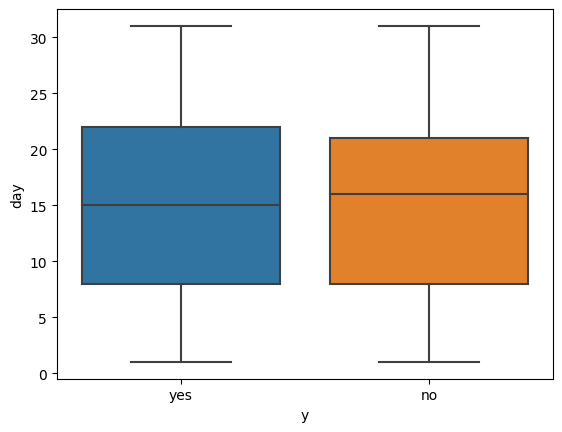

In [ ]:
num_var = ["age","duration","campaign", "pdays", "previous","balance", "day"]

for i in num_var:
    sns.boxplot(x = 'y',y = i,data = df)
    plt.show()

Berdasarkan plot distribusi statistik yang dikelompokkan berdasarkan nilai pada variabel `y`-nya, diketahui bahwa:
1. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien dengan umur 30-40 tahun.
2. Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar.

Untuk melihat pengaruh variabel numerik lain terhadap variabel `y` dapat lebih jelas menggunakan matriks korelasi.

## Korelasi pada kolom numerik terhadap variabel `y`

In [ ]:
# Mengubah nilai kolom y
mapping = {"yes":1,
          "no":0}

df['y'] = df['y'].map(mapping)

<ipython-input-23-893b6c67758b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")


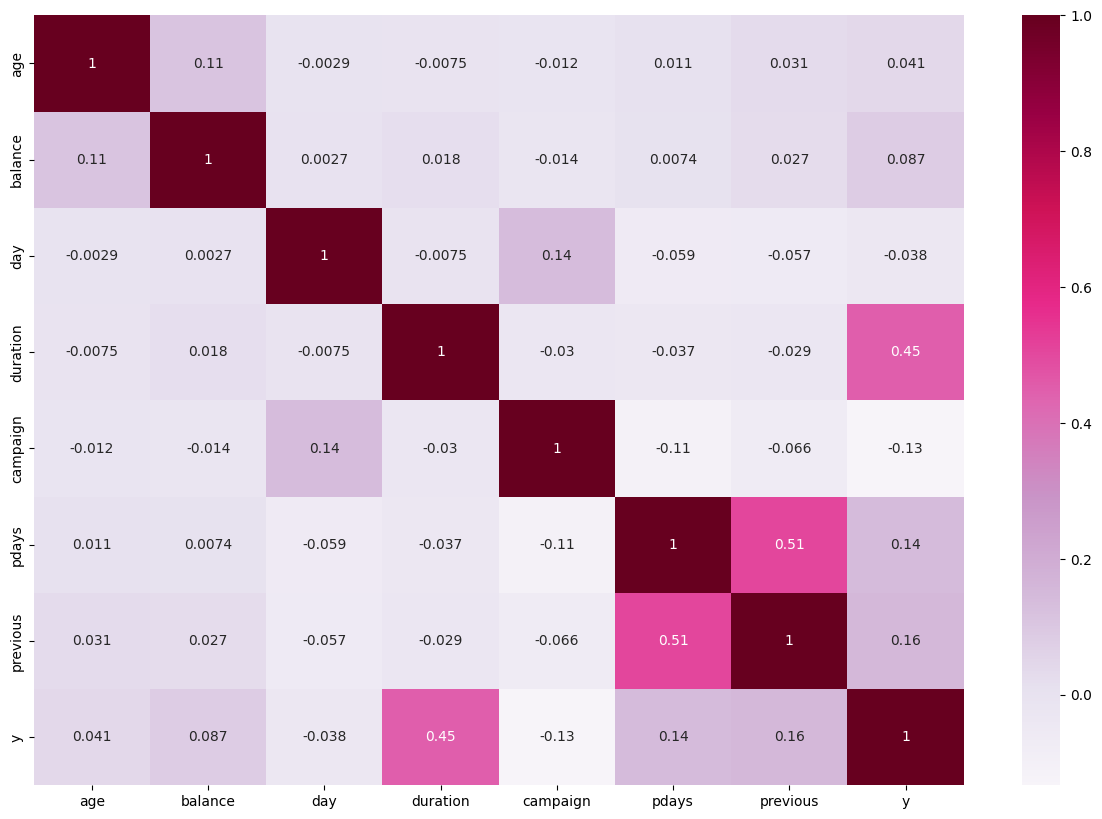

In [ ]:
# Visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

Berdasarkan plot di atas, diketahui bahwa kolom `Age`, `campaign`, dan `cons.conf.idx` memiliki korelasi yang sangat rendah terhadap variabel `y`. Artinya umur klien, jumlah kontak yang dilakukan selama kampanye, dan *consumer confidence index* atau karakteristik ekonomi berupa kepercayaan konsumen cenderung tidak mempengaruhi keputusan klien dalam memilih akan berlangganan deposito berjangka atau tidak. Selain itu, kolom `Duration` memiliki korelasi yang paling tinggi terhadap variabel `y` yaitu sebesar 0.41. Ini menunjukkan bahwa durasi kontak terakhir yang dilakukan semakin panjang, maka kemungkinan klien untuk memilih berlangganan deposito berjangka akan semakin besar (hal ini juga membuktikan interpretasi secara grafis hubungan durasi dengan variabel `y` pada 5.2). Selanjutnya, karakteristik sosial dan ekonomi memiliki korelasi negatif dengan variabel `y`.

In [ ]:
# # mo dicbain tuning yakk

# from imblearn.under_sampling import RandomUnderSampler

# # Membaca dataset
# data = pd.read_csv("/content/drive/MyDrive/AI_UAS/bankresampling.csv")

# # Menampilkan jumlah sampel dan distribusi kelas sebelum resampling
# print("Jumlah sampel sebelum resampling:", len(data))
# print("Distribusi kelas sebelum resampling:")
# print(data['y'].value_counts())

# # Inisialisasi objek RandomUnderSampler
# # rus = RandomUnderSampler(sampling_strategy={'no': 5000})
# rus = RandomUnderSampler(sampling_strategy= {'no': 5000, 'yes': 'auto'})

# # Melakukan resampling pada data
# X_resampled, y_resampled = rus.fit_resample(data.drop('y', axis=1), data['y'])

# # Menggabungkan kembali fitur dan target
# resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=data.columns.drop('y')), pd.Series(y_resampled, name='y')], axis=1)

# # Menampilkan jumlah sampel dan distribusi kelas setelah resampling
# print("Jumlah sampel setelah resampling:", len(resampled_data))
# print("Distribusi kelas setelah resampling:")
# print(resampled_data['y'].value_counts())

# # YANG INI GA ADA RESAMPLE TUNING BEZIR:")

## Nilai dan distribusi statistik masing-masing kolom kategorik berdasarkan variabel `y`

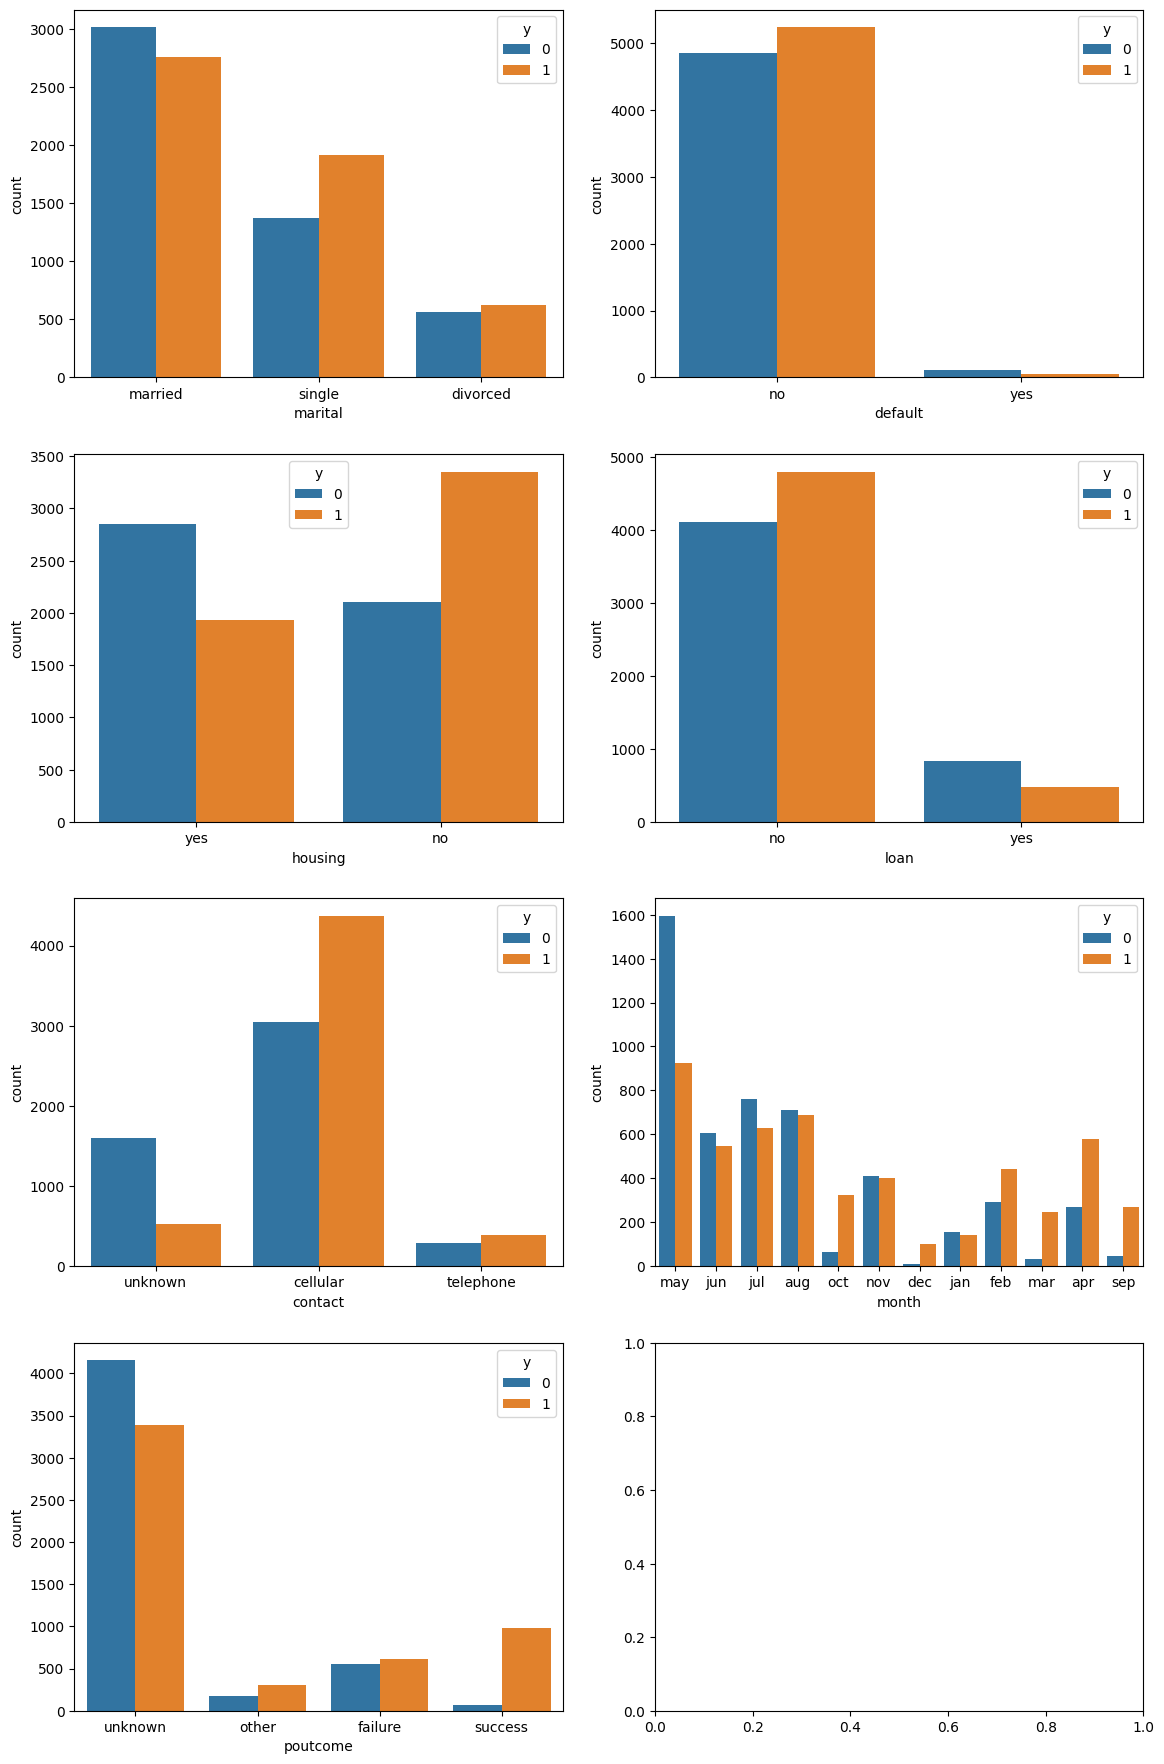

In [ ]:
# Visualisasi menggunakan countplot
cols = ['marital','default','housing','loan','contact','month','poutcome']

fig, ax = plt.subplots(4, 2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i])

fig.tight_layout(pad=2.0)

# 'day_of_week'

<Axes: xlabel='job', ylabel='count'>

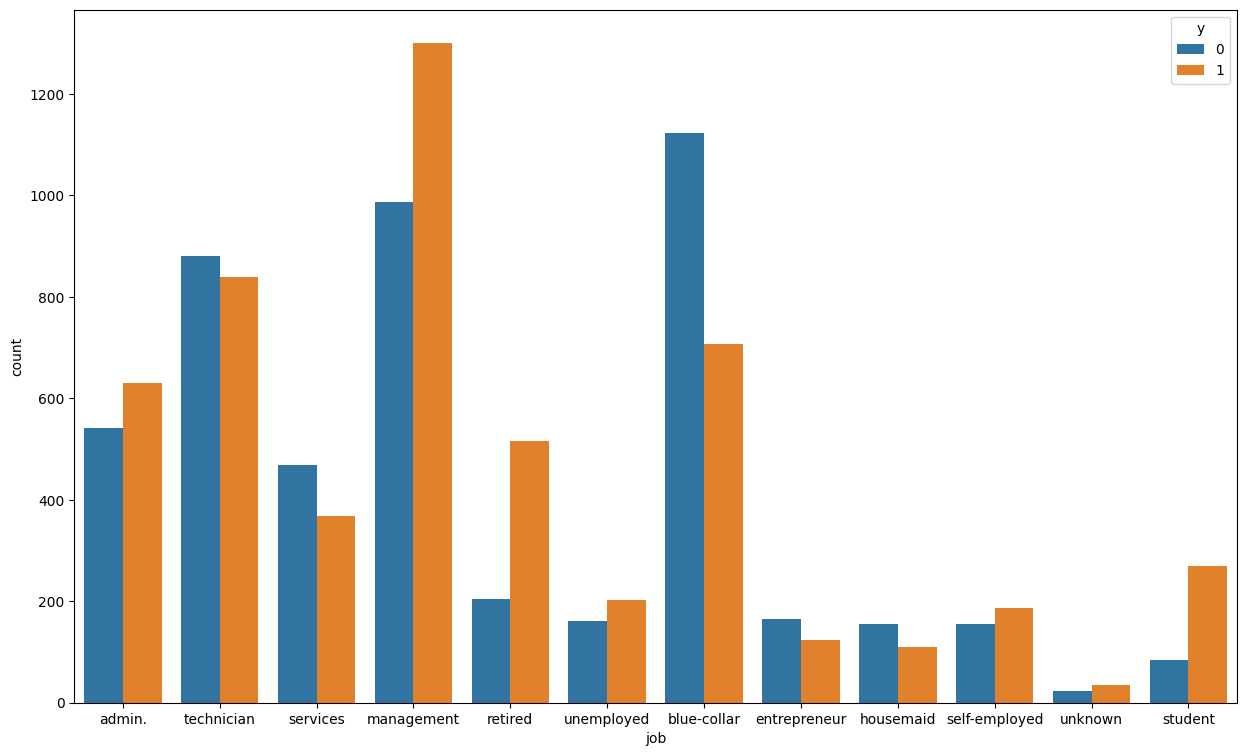

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df, x='job', hue='y')

<Axes: xlabel='education', ylabel='count'>

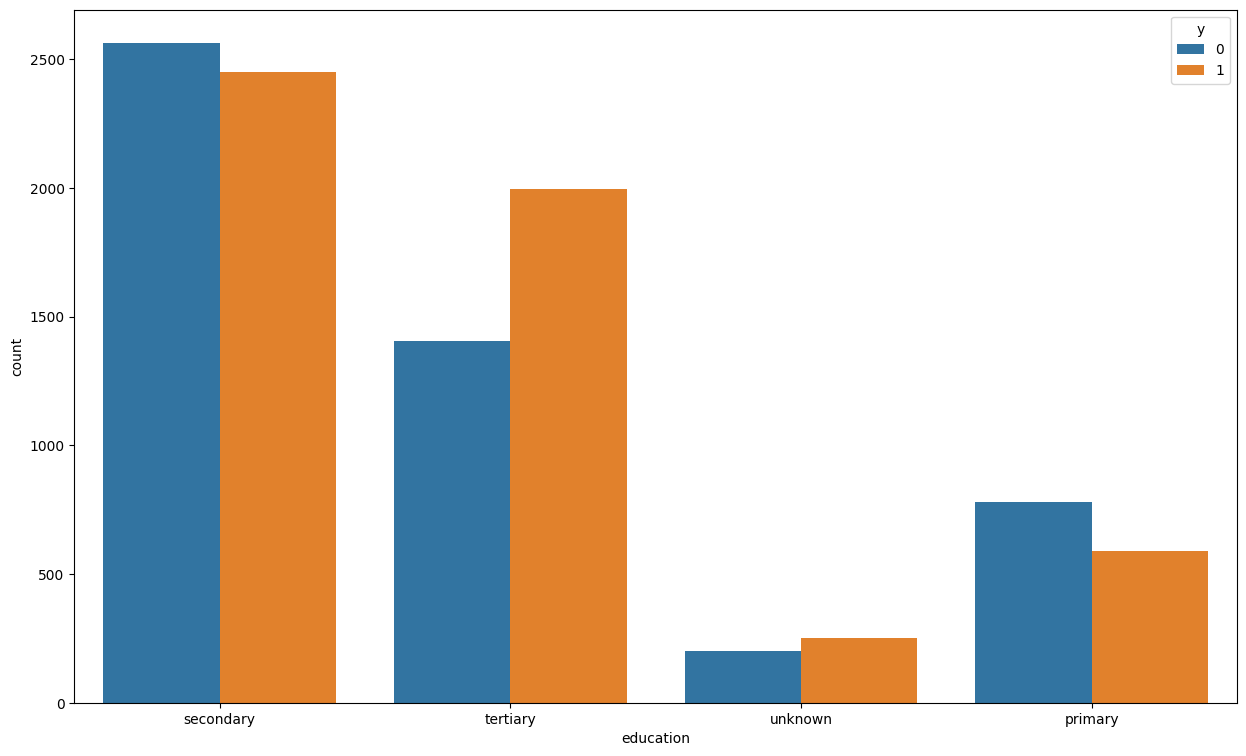

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df, x='education', hue='y')

Berdasarkan plot di atas, dapat diketahui bahwa:
1. Mayoritas klien adalah klien dengan status sudah menikah, di mana kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang sudah menikah.
2. Mayoritas klien juga memiliki rumah. Namun, kepemilikan rumah cenderung tidak memiliki pengaruh dalam keputusan klien untuk memilih berlangganan deposito atau tidak.
3. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang tidak memiliki hutang/loan.
4. Klien yang memilih untuk berlangganan deposito juga kebanyakan bekerja dengan profesi admin.
5. Mayoritas klien memiliki tingkat pendidikan yaitu *university degree*.
6. Waktu kontak yang dilakukan dengan klien tidak mempengaruhi keputusan klien untuk memilih berlangganan deposito atau tidak.

# Data preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

## Menghapus kolom yang tidak memiliki pengaruh pada variabel `y`

Sebelumnya diketahui bahwa kolom `month` dan `day_of_week` tidak memiliki pengaruh pada variabel `y`. Untuk kolom `Age`, `campaign`, dan `cons.conf.idx` tidak dihapus dan masih akan disertakan dalam analisis karena ketiga variabel ini akan dilihat pengaruhnya berdasarkan nilai *feature importance*.

In [ ]:
df.drop(['month'], axis=1, inplace=True)

## Tidak menyertakan *outlier*

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,41.191290,1530.428571,15.467923,383.897959,2.486476,53.506591,0.839469,0.516453
std,11.995931,3253.953472,8.449943,354.273987,2.677860,111.009687,2.182586,0.499754
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,123.000000,8.000000,146.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,548.000000,15.000000,263.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,1775.000000,21.000000,513.000000,3.000000,78.000000,1.000000,1.000000
max,95.000000,102127.000000,31.000000,3881.000000,43.000000,854.000000,58.000000,1.000000


Diketahui bahwa nilai maksimum pada kolom `Age` dan `campaign` memiliki perbedaan yang sangat signifikan terhadap nilai kuartil-3. Klien dengan umur 98 tahun memiliki kemungkinan sangat kecil untuk disertakan dalam kampanye ini, sehingga umur di atas 70 tahun tidak disertakan dalam analisis. Selain itu, jumlah kontak yang dihubungi lebih dari 10 juga tidak disertakan dalam analisis karena dianggap sebagai *outlier*.

In [ ]:
df = df[df['age']<70].copy()

In [ ]:
df = df[df['campaign']<10].copy()

In [ ]:
df.reset_index(inplace=True)

## Standarisasi data

Standarisasi data dilakukan karena masing-masing kolom numerik tidak memiliki distribusi tertentu dan memiliki satuan yang berbeda.

In [ ]:
# Standarisasi dengan StandardScaler
df_scalling = df[['age','duration','pdays','previous','balance','campaign',
                  'day']]

scaler = StandardScaler()
scaler.fit(df_scalling)
scaled_features = scaler.transform(df_scalling)
df_scalling = pd.DataFrame(scaled_features,columns = df_scalling.columns)
df_scalling.head()

# 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','emp.var.rate'

,age,duration,pdays,previous,balance,campaign,day
0,1.758260,1.841148,-0.492707,-0.384698,0.280071,-0.752669,-1.224573
1,1.476893,3.034172,-0.492707,-0.384698,-0.475177,-0.752669,-1.224573
2,0.070053,2.815217,-0.492707,-0.384698,-0.072575,-0.752669,-1.224573
3,1.383103,0.541454,-0.492707,-0.384698,0.323782,-0.752669,-1.224573
4,1.289314,0.805323,-0.492707,-0.384698,-0.429494,-0.123075,-1.224573


## *Encoder* menggunakan pd.get_dummies pada kolom kategorik

In [ ]:
df_scalling['job'] = df['job']
df_scalling['marital'] = df['marital']
df_scalling['education'] = df['education']
df_scalling['default'] = df['default']
df_scalling['housing'] = df['housing']
df_scalling['loan'] = df['loan']
df_scalling['contact'] = df['contact']
df_scalling['poutcome'] = df['poutcome']

In [ ]:
# Encoder
df_new = pd.get_dummies(df_scalling)

In [ ]:
df_new['y'] = df['y']

In [ ]:
df_new.head()

,age,duration,pdays,previous,balance,campaign,day,job_admin.,job_blue-collar,job_entrepreneur,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.758260,1.841148,-0.492707,-0.384698,0.280071,-0.752669,-1.224573,1,0,0,...,1,0,0,0,1,0,0,0,1,1
1,1.476893,3.034172,-0.492707,-0.384698,-0.475177,-0.752669,-1.224573,1,0,0,...,1,0,0,0,1,0,0,0,1,1
2,0.070053,2.815217,-0.492707,-0.384698,-0.072575,-0.752669,-1.224573,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,1.383103,0.541454,-0.492707,-0.384698,0.323782,-0.752669,-1.224573,0,0,0,...,1,0,0,0,1,0,0,0,1,1
4,1.289314,0.805323,-0.492707,-0.384698,-0.429494,-0.123075,-1.224573,1,0,0,...,1,0,0,0,1,0,0,0,1,1


## Splitting data

In [ ]:
X = df_new.drop('y', axis=1)
y = df_new.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat data dari file CSV
file_path = '/content/bankresampling.csv'  # Ubah dengan lokasi dan nama file CSV Anda
data = pd.read_csv(file_path)

# # Memisahkan kolom target dari fitur-fitur
# y = data['y']  # Kolom target
# X = data.drop('y', axis=1)  # Kolom fitur

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menyimpan data latih dan data uji ke dalam file CSV
X_train.to_csv('X_train_res.csv', index=False)
X_test.to_csv('X_test_res.csv', index=False)
y_train.to_csv('y_train_res.csv', index=False, header=True)  # Sertakan header pada y_train
y_test.to_csv('y_test_res.csv', index=False, header=True)  # Sertakan header pada y_test


OVERSAMPLING

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# y_train_resampled.value_counts()
# # smote = SMOTE(sampling_strategy={1:2000, 0:2000})
# # X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)


1    3990
0    3990
Name: y, dtype: int64

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# under_sampler = RandomUnderSampler (sampling_strategy={1:5000, 0:5000})
# X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled,y_train_resampled)
# y_train_resampled.value_counts()

0    5000
1    5000
Name: y, dtype: int64

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # Melakukan oversampling dengan SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Menampilkan jumlah sampel untuk setiap kelas setelah oversampling
# print("Jumlah sampel untuk setiap kelas setelah oversampling:")
# print(y_train_resampled.value_counts())

# # Menggunakan RandomUnderSampler pada kelas yang memiliki sampel lebih banyak setelah oversampling
# under_sampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
# X_train_resampled_under, y_train_resampled_under = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# # Menampilkan jumlah sampel untuk setiap kelas setelah undersampling
# print("\nJumlah sampel untuk setiap kelas setelah undersampling:")
# print(y_train_resampled_under.value_counts())


Jumlah sampel untuk setiap kelas setelah oversampling:
1    3990
0    3990
Name: y, dtype: int64

Jumlah sampel untuk setiap kelas setelah undersampling:
0    3990
1    3990
Name: y, dtype: int64


In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # Melakukan oversampling dengan SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Menampilkan jumlah sampel untuk setiap kelas setelah oversampling
# print("Jumlah sampel untuk setiap kelas setelah oversampling:")
# print(y_train_resampled.value_counts())

# # Menggunakan RandomUnderSampler pada kelas yang memiliki sampel lebih banyak setelah oversampling
# under_sampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
# X_train_resampled_under, y_train_resampled_under = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# # Menampilkan jumlah sampel untuk setiap kelas setelah undersampling
# print("\nJumlah sampel untuk setiap kelas setelah undersampling:")
# print(y_train_resampled_under.value_counts())


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Inisialisasi RandomUnderSampler dengan jumlah sampel target 2000 untuk kelas '2'
# under_sampler = RandomUnderSampler(random_state=42)

# # Melakukan undersampling pada data
# X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Inisialisasi RandomUnderSampler dengan jumlah sampel target 2000 untuk kelas '2'
# under_sampler = RandomUnderSampler(random_state=42)

# # Melakukan undersampling pada data
# X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)


In [ ]:
# import pandas as pd

# # Menggabungkan kembali X_train_resampled dan y_train_resampled
# resampled_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# # Menampilkan jumlah sampel untuk setiap kelas
# print(resampled_data['y'].value_counts())


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# under_sampler = RandomUnderSampler (sampling_strategy={1:20000, 0:20000})
# X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled,y_train_resampled)
# y_train_resampled.value_counts()

# Pendefinisian model

In [ ]:
lr = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=[100,200,300])
# knn = KNeighborsClassifier()
# svm = SVC(kernel='linear')
# nb = GaussianNB()

# Pelatihan model

In [ ]:
# Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# # K-NN
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)

In [ ]:
# # SVM

# #Mempersiapkan data
# df_.drop_duplicates(keep='last', inplace=True)
# df_.reset_index(inplace=True)
# df_.drop('index', axis=1, inplace=True)
# df_.drop(['month','day_of_week'], axis=1, inplace=True)
# df_ = df_[df_['age']<70].copy()
# df_ = df_[df_['campaign']<10].copy()
# df_.reset_index(inplace=True)

# df_scalling_ = df_[['age','duration','pdays','previous','emp.var.rate','campaign',
#                   'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

# scaler_ = StandardScaler()
# scaler_.fit(df_scalling_)
# scaled_features_ = scaler_.transform(df_scalling_)
# df_scalling_ = pd.DataFrame(scaled_features_,columns = df_scalling_.columns)

# df_scalling_['job'] = df_['job']
# df_scalling_['marital'] = df_['marital']
# df_scalling_['education'] = df_['education']
# df_scalling_['default'] = df_['default']
# df_scalling_['housing'] = df_['housing']
# df_scalling_['loan'] = df_['loan']
# df_scalling_['contact'] = df_['contact']
# df_scalling_['poutcome'] = df_['poutcome']

# df_new_ = pd.get_dummies(df_scalling_)
# df_new_['y'] = df_['y']
# mapping = {"yes":1,
#           "no":0}

# df_new_['y'] = df_['y'].map(mapping)

# X_ = df_new_.drop('y', axis=1)
# y_ = df_new_.y

# X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=0)

In [ ]:
# svm.fit(X_train_, y_train_)
# y_pred_svm = svm.predict(X_test_)

In [ ]:
# Decision Tree
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# # Gaussian NB
# nb.fit(X_train, y_train)
# y_pred_nb = nb.predict(X_test)

# Evaluasi model

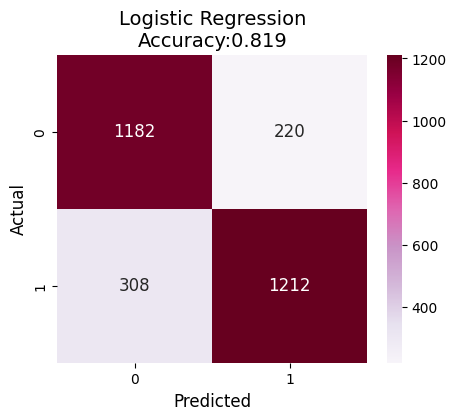

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      1402
           1       0.85      0.80      0.82      1520

    accuracy                           0.82      2922
   macro avg       0.82      0.82      0.82      2922
weighted avg       0.82      0.82      0.82      2922

Accuracy Score:- 0.8193018480492813
Precision Score:- 0.8463687150837989
Recall Score:- 0.7973684210526316


In [ ]:
# Create a confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
# print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
# print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')

In [ ]:
# # Create a confusion Matrix for K-NN
# cm = confusion_matrix(y_test, y_pred_knn)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
# plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
# plt.xlabel("Predicted", fontsize=12)
# plt.ylabel("Actual", fontsize=12)
# plt.show()
# print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
# print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
# print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')

In [ ]:
# # Create a confusion Matrix for SVM
# cm = confusion_matrix(y_test_, y_pred_svm)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
# plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test_, y_pred_svm)), fontsize=14)
# plt.xlabel("Predicted", fontsize=12)
# plt.ylabel("Actual", fontsize=12)
# plt.show()
# print("Classification Report:\n", classification_report(y_test_, y_pred_svm))

# print(f'Accuracy Score:- {accuracy_score(y_test_, y_pred_svm)}')
# print(f'Precision Score:- {precision_score(y_test_,y_pred_svm)}')
# print(f'Recall Score:- {recall_score(y_test_,y_pred_svm)}')

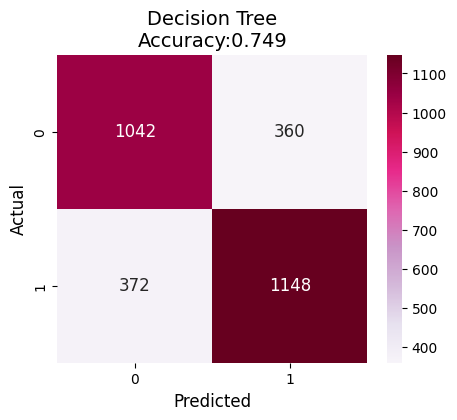

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1402
           1       0.76      0.76      0.76      1520

    accuracy                           0.75      2922
   macro avg       0.75      0.75      0.75      2922
weighted avg       0.75      0.75      0.75      2922

Accuracy Score:- 0.7494866529774127
Precision Score:- 0.7612732095490716
Recall Score:- 0.7552631578947369


In [ ]:
# Create a confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_tree)}')
# print(f'Precision Score:- {precision_score(y_test,y_pred_tree)}')
# print(f'Recall Score:- {recall_score(y_test,y_pred_tree)}')

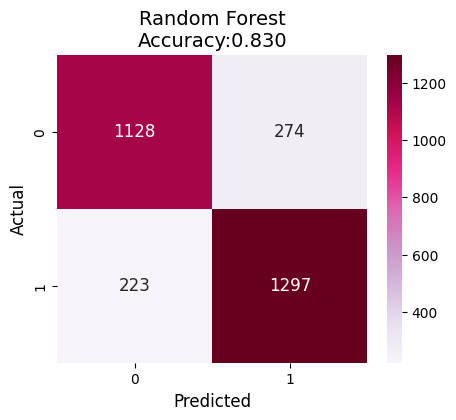

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1402
           1       0.83      0.85      0.84      1520

    accuracy                           0.83      2922
   macro avg       0.83      0.83      0.83      2922
weighted avg       0.83      0.83      0.83      2922

Accuracy Score:- 0.8299110198494182
Precision Score:- 0.8255887969446213
Recall Score:- 0.8532894736842105


In [ ]:
#  Create a confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')

In [ ]:
# # Create a confusion Matrix for Naive Bayes
# cm = confusion_matrix(y_test, y_pred_nb)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
# plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
# plt.xlabel("Predicted", fontsize=12)
# plt.ylabel("Actual", fontsize=12)
# plt.show()
# print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
# print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
# print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')

Berdasarkan hasil klasifikasi, diketahui bahwa semua algoritma belum memberikan performa prediksi klasifikasi yang cukup baik. Hal ini dikarenakan data yang digunakan adalah *imbalanced dataset* sehingga diperlukan penanganan lebih lanjut untuk kasus ini. Namun, dilihat dari masing-masing performa prediksi, algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.91, nilai presisi sebesar 0.65, nilai recall 0.47, dan f1-score sebesar 0.53.

#HYPERPARAMETER / TUNING SEK


In [ ]:
# # Hyperparameter Optimization
# parameters = {'max_features': ['log2', 'sqrt','auto'],
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50],
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# # Train the model using the training sets
# clf.fit(X_train, y_train)

In [ ]:
lr = LogisticRegression()
# knn = KNeighborsClassifier()
# svm = SVC(kernel='linear')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
# nb = GaussianNB()

In [ ]:
# random forest tuning
# 100 estimator
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Expanded parameter grid
grid_search = {
    'n_estimator' : [100],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = RandomForestClassifier(random_state=42)
model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

# Get best parameters
best_params = model.best_params_
print(f'Best Params: {best_params}')

# Create a new RandomForestClassifier with the best parameters
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
prediction_forest = best_rf_clf.predict(X_test)
print(confusion_matrix(y_test, prediction_forest))
print(classification_report(y_test, prediction_forest))
acc = accuracy_score(y_test, prediction_forest)
print(f'Accuracy: {acc}')

# Save the best RandomForestClassifier model to a file
joblib.dump(best_rf_clf, 'model_random_forest.pkl')

# Save the best RandomForestClassifier model to a file in joblib format
joblib.dump(best_rf_clf, 'model_random_forest.joblib')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[1127  275]
 [ 217 1303]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1402
           1       0.83      0.86      0.84      1520

    accuracy                           0.83      2922
   macro avg       0.83      0.83      0.83      2922
weighted avg       0.83      0.83      0.83      2922

Accuracy: 0.8316221765913757


['model_random_forest.joblib']

In [ ]:
# random forest tuning
# 200 estimator
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Expanded parameter grid
grid_search = {
    'n_estimator' : [200],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = RandomForestClassifier(random_state=42)
model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

# Get best parameters
best_params = model.best_params_
print(f'Best Params: {best_params}')

# Create a new RandomForestClassifier with the best parameters
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
prediction_forest = best_rf_clf.predict(X_test)
print(confusion_matrix(y_test, prediction_forest))
print(classification_report(y_test, prediction_forest))
acc = accuracy_score(y_test, prediction_forest)
print(f'Accuracy: {acc}')

# Save the best RandomForestClassifier model to a file
joblib.dump(best_rf_clf, 'model_random_forest.pkl')

# Save the best RandomForestClassifier model to a file in joblib format
joblib.dump(best_rf_clf, 'model_random_forest.joblib')

In [ ]:
# random forest tuning
# 300 estimator
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Expanded parameter grid
grid_search = {
    'n_estimator' : [300],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = RandomForestClassifier(random_state=42)
model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

# Get best parameters
best_params = model.best_params_
print(f'Best Params: {best_params}')

# Create a new RandomForestClassifier with the best parameters
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
prediction_forest = best_rf_clf.predict(X_test)
print(confusion_matrix(y_test, prediction_forest))
print(classification_report(y_test, prediction_forest))
acc = accuracy_score(y_test, prediction_forest)
print(f'Accuracy: {acc}')

# Save the best RandomForestClassifier model to a file
joblib.dump(best_rf_clf, 'model_random_forest.pkl')

# Save the best RandomForestClassifier model to a file in joblib format
joblib.dump(best_rf_clf, 'model_random_forest.joblib')

In [ ]:
# Decision tree
# menggunakan parameter sendiri & fiks
# import joblib
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Expanded parameter grid
grid_search = {
    # 'n_estimators' : [100,200,300],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

# Get best parameters
best_params = model.best_params_
print(f'Best Params: {best_params}')

# Create a new RandomForestClassifier with the best parameters
best_rf_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
prediction_forest = best_rf_clf.predict(X_test)
print(confusion_matrix(y_test, prediction_forest))
print(classification_report(y_test, prediction_forest))
acc = accuracy_score(y_test, prediction_forest)
print(f'Accuracy: {acc}')

# # Memuat kembali model dari file .pkl
# loaded_model = joblib.load('model_decision_tree.pkl')

# # Simpan kembali model yang dimuat dalam format .joblib
# joblib.dump(loaded_model, 'model_decision_tree.joblib')

# Save the best DecisionTreeClassifier model to a file in pickle format
with open('model_decision_tree.pkl', 'wb') as file:
    pickle.dump(best_rf_clf, file)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
[[ 959  443]
 [ 236 1284]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      1402
           1       0.74      0.84      0.79      1520

    accuracy                           0.77      2922
   macro avg       0.77      0.76      0.76      2922
weighted avg       0.77      0.77      0.77      2922

Accuracy: 0.7676249144421629


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
# logistik regression
# menggunakan clasification report
# naikin max_iternya dari 1500, dst
# import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Misalkan X_train, X_test, y_train, y_test adalah data yang sudah dipisahkan

# Penskalaan data jika diperlukan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Sesuaikan dengan dataset yang digunakan
X_test_scaled = scaler.transform(X_test)  # Penskalaan data uji

# Daftar parameter yang ingin diuji
grid_search = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [1500, 2000, 2500],  # Tambah nilai max_iter yang lebih besar
    'random_state': [42]
}

# Inisialisasi model Logistic Regression
clf = LogisticRegression()

# Gunakan X_train_scaled jika kamu telah melakukan penskalaan
model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
model.fit(X_train_scaled, y_train)  # Sesuaikan dengan dataset yang digunakan

best_model = model.best_estimator_  # Mendapatkan model terbaik

# Gunakan model terbaik untuk prediksi pada data uji
y_pred = best_model.predict(X_test_scaled)  # Sesuaikan dengan dataset yang digunakan

# Evaluasi model menggunakan beberapa metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Tampilkan perincian evaluasi lebih lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# # Memuat kembali model dari file .sav
# loaded_model = joblib.load('model_logistik.pkl')

# # Simpan kembali model dalam format .joblib
# joblib.dump(loaded_model, 'model_logistik.joblib')

# Save the best DecisionTreeClassifier model to a file in pickle format
with open('model_logistic regression.pkl', 'wb') as file:
    pickle.dump(best_rf_clf, file)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Akurasi: 0.8186173853524983
Presisi: 0.849083215796897
Recall: 0.7921052631578948
F1 Score: 0.8196051735874744

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1402
           1       0.85      0.79      0.82      1520

    accuracy                           0.82      2922
   macro avg       0.82      0.82      0.82      2922
weighted avg       0.82      0.82      0.82      2922



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
# # RANDOM

# import joblib
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# grid_search = {
#     # 'n_estimator' : [100,200,300],
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# clf = RandomForestClassifier(random_state=42)
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Get best parameters
# best_params = model.best_params_
# print(f'Best Params: {best_params}')

# # Create a new RandomForestClassifier with the best parameters
# best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# prediction_forest = best_rf_clf.predict(X_test)
# print(confusion_matrix(y_test, prediction_forest))
# print(classification_report(y_test, prediction_forest))
# acc = accuracy_score(y_test, prediction_forest)
# print(f'Accuracy: {acc}')

# # Save the best RandomForestClassifier model to a file
# joblib.dump(best_rf_clf, 'model_random_forest.sav')

# # Save the best RandomForestClassifier model to a file in joblib format
# joblib.dump(best_rf_clf, 'model_random_forest.joblib')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[7488  181]
 [ 656  316]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7669
           1       0.64      0.33      0.43       972

    accuracy                           0.90      8641
   macro avg       0.78      0.65      0.69      8641
weighted avg       0.89      0.90      0.89      8641

Accuracy: 0.9031362110866797


['model_random_forest.joblib']

In [ ]:
# from sklearn.model_selection import GridSearchCV

# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4, 6, 8],
#                'min_samples_split': [5, 7,10],
#                'n_estimators': [20]}

# clf = RandomForestClassifier()
# model = GridSearchCV(estimator = clf, param_grid = grid_search,
#                                cv = 4, verbose= 5, n_jobs = -1)
# model.fit(X_train,y_train)

# predictionforest = model.best_estimator_.predict(X_test)
# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# acc4 = accuracy_score(y_test,predictionforest)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[[7669    0]
 [ 970    2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7669
           1       1.00      0.00      0.00       972

    accuracy                           0.89      8641
   macro avg       0.94      0.50      0.47      8641
weighted avg       0.90      0.89      0.84      8641



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# grid_search = {
#     'n_estimators' : [100,200,300],
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# clf = RandomForestClassifier(random_state=42)
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Get best parameters
# best_params = model.best_params_
# print(f'Best Params: {best_params}')

# # Create a new RandomForestClassifier with the best parameters
# best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# prediction_forest = best_rf_clf.predict(X_test)
# print(confusion_matrix(y_test, prediction_forest))
# print(classification_report(y_test, prediction_forest))
# acc = accuracy_score(y_test, prediction_forest)
# print(f'Accuracy: {acc}')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# grid_search = {
#     'n_estimators' : [100,200,300],y
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# clf = DecisionTreeClassifier(random_state=42)
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Get best parameters
# best_params = model.best_params_
# print(f'Best Params: {best_params}')

# # Create a new RandomForestClassifier with the best parameters
# best_rf_clf = DecisionTreeClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Make predictions and evaluate the model
# prediction_forest = best_rf_clf.predict(X_test)
# print(confusion_matrix(y_test, prediction_forest))
# print(classification_report(y_test, prediction_forest))
# acc = accuracy_score(y_test, prediction_forest)
# print(f'Accuracy: {acc}')

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Daftar parameter yang ingin diuji
# grid_search = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 1.0, 10.0],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [100, 200, 300],
#     'random_state': [42]  # Atur seed sesuai kebutuhan
# }

# # Inisialisasi model Logistic Regression
# clf = LogisticRegression()

# # Menerapkan GridSearchCV
# model = GridSearchCV(estimator=clf, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1)
# model.fit(X_train, y_train)

# # Mendapatkan parameter terbaik
# best_params = model.best_params_


In [ ]:
# tree_clf = DecisionTreeClassifier(criterion=best_params['criterion'],
#                                   splitter=best_params['splitter'],
#                                   max_depth=best_params['max_depth'],
#                                   min_samples_split=best_params['min_samples_split'],
#                                   min_samples_leaf=best_params['min_samples_leaf'],
#                                   random_state=42)

# clf = DecisionTreeClassifier()
# model = GridSearchCV(estimator = clf, param_grid = grid_search,
#                                cv = 4, verbose= 5, n_jobs = -1)
# model.fit(X_train,y_train)

# predictionforest = model.best_estimator_.predict(X_test)
# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# acc4 = accuracy_score(y_test,predictionforest)

In [ ]:
!

hype


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim= 4, activation= activation))
#     model.add(Dense(neurons, activation= activation))
#     model.add(Dropout(0.3))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
#     return model

In [ ]:
# # Defining grid parameters
# activation = ['softmax', 'relu']
# neurons = [5, 10]
# optimizer = ['Adam', 'Adamax']
# param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

# clf = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 2)

In [ ]:
# model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
# model.fit(X_Train,Y_Train)

In [ ]:
# print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3),
#                                                    model.best_params_))

In [ ]:
# prediction_test = model.predict(X_Test)
# print(confusion_matrix(Y_Test,prediction_test))
# print(classification_report(Y_Test,prediction_test))
# accuracy_ANN = accuracy_score(Y_Test,prediction_test)

# Features Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek *feature importance* dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [ ]:
# lr = LogisticRegression()
# # knn = KNeighborsClassifier()
# # svm = SVC(kernel='linear')
# tree = DecisionTreeClassifier()
# rf = RandomForestClassifier(n_estimators=300)
# # nb = GaussianNB()

In [ ]:
data = df_new.copy()
data.drop('y', axis=1, inplace=True)
feature_names = list(data.columns.values)

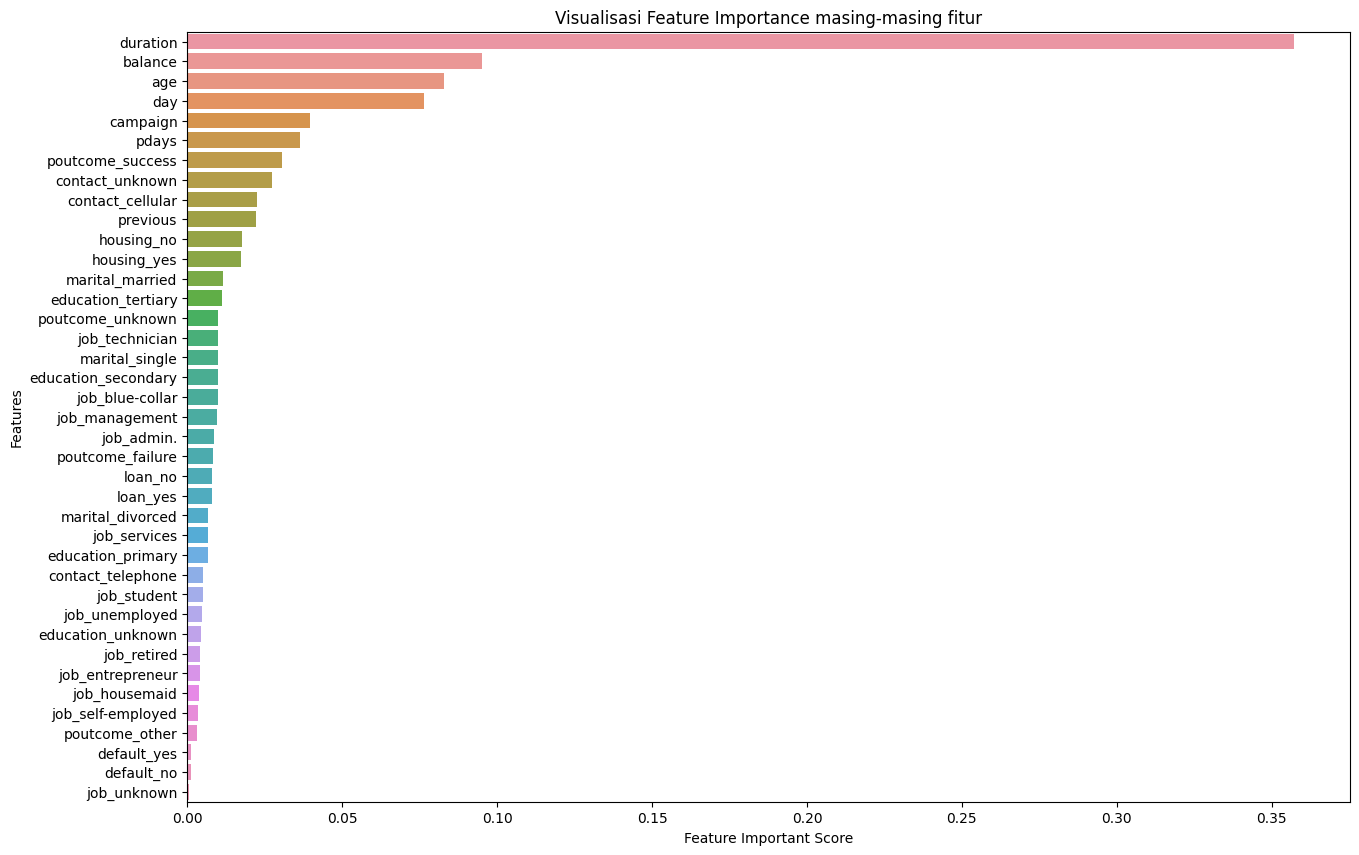

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Buat instance RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Latih model menggunakan data latih
rf.fit(X_train, y_train)

# Hitung feature importance
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")
plt.show()


In [ ]:
# feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
# feature_imp

NotFittedError: ignored

In [ ]:
# # Visualisasi features importance
# plt.figure(figsize=(15, 10))
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel("Feature Important Score")
# plt.ylabel("Features")
# plt.title("Visualisasi Feature Importance masing-masing fitur")

# plt.show()

NameError: ignored

<Figure size 1500x1000 with 0 Axes>

Berdasarkan plot di atas, kolom `previous` adalah kolom numerik dengan nilai *feature important* terendah. Namun, kolom ini tidak akan dihapus dari analisis karena korelasi yang cenderung tinggi dengan variabel targetnya. Sehingga, tidak ada variabel yang akan dihapus setelah pengecekan *feature importance*.

# Conclusions

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.
2. Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
3. Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar, karena durasi dalam telepon memiliki korelasi paling kuat terhadap variabel y.
4. Karakteristik sosial dan ekonomi memiliki korelasi negatif dengan variabel y.
5. Mayoritas klien adalah klien dengan status sudah menikah, dengan pekerjaan mayoritas sebagai admin, tidak memiliki beban hutang, dan mempunyai gelar pendidikan *university degree*.
6. Algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.91, nilai presisi sebesar 0.65, nilai recall 0.47, dan f1-score sebesar 0.53.
7. Untuk meningkatkan performa prediksi klasifikasi, diperlukan penanganan pada data *imbalanced* dan dilakukan *hypertuning parameter*.